In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plot

In [3]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings('ignore')
from tensorflow.python.util import deprecation
deprecation._PRINT_DEPRECATION_WARNINGS = False

In [4]:
from keras.models import Sequential, load_model
from keras.layers.core import Activation, Dropout, Dense
from keras.utils import np_utils

In [5]:
from keras.datasets import mnist

In [6]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
from keras import layers

In [9]:
model = Sequential()

#First layer (input layer)
model.add(Dense(512,input_shape=[784]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Second Layer (Hidden Layer)
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.2))

#Output Layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.add(Dropout(0.2))

In [10]:
model.compile(
    loss = 'categorical_crossentropy',
    metrics = ['accuracy'],
    optimizer = 'adam'
)

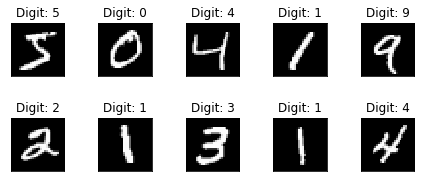

In [12]:
for i in range(10):
    plot.subplot(3,5,i+1)
    plot.tight_layout()
    plot.imshow(X_train[i], cmap = 'gray', interpolation = 'none')
    plot.title("Digit: {}".format(y_train[i]))
    plot.xticks([])
    plot.yticks([])
    

In [13]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [14]:
X_train.shape

(60000, 784)

In [16]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /=  255
X_test /=255

In [17]:
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Text(0.5, 1.0, 'Digit: 3')

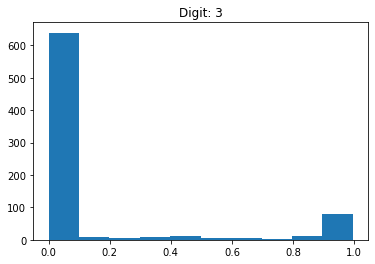

In [20]:
plot.hist(X_train[10])
plot.title("Digit: {}".format(y_train[10]))

In [21]:
print(np.unique(y_train, return_counts = True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))


In [23]:
n_classes = 10
Y_train = np_utils.to_categorical(y_train, n_classes)
for i in range(10):
    print(Y_train[i])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [24]:
Y_test = np_utils.to_categorical(y_test,n_classes)

In [26]:
#model Training

history = model.fit(
    X_train,Y_train,
    batch_size = 128,
    epochs = 20,
    verbose = 2,
    validation_data = (X_test,Y_test)
)

Epoch 1/20
469/469 - 4s - loss: 3.3961 - accuracy: 0.7428 - val_loss: 0.1396 - val_accuracy: 0.9532
Epoch 2/20
469/469 - 3s - loss: 3.2839 - accuracy: 0.7756 - val_loss: 0.1133 - val_accuracy: 0.9647
Epoch 3/20
469/469 - 3s - loss: 3.3070 - accuracy: 0.7795 - val_loss: 0.0780 - val_accuracy: 0.9767
Epoch 4/20
469/469 - 3s - loss: 3.2421 - accuracy: 0.7868 - val_loss: 0.0808 - val_accuracy: 0.9735
Epoch 5/20
469/469 - 3s - loss: 3.2578 - accuracy: 0.7878 - val_loss: 0.0675 - val_accuracy: 0.9787
Epoch 6/20
469/469 - 3s - loss: 3.2352 - accuracy: 0.7894 - val_loss: 0.0610 - val_accuracy: 0.9806
Epoch 7/20
469/469 - 3s - loss: 3.2482 - accuracy: 0.7899 - val_loss: 0.0678 - val_accuracy: 0.9794
Epoch 8/20
469/469 - 3s - loss: 3.2700 - accuracy: 0.7897 - val_loss: 0.0837 - val_accuracy: 0.9771
Epoch 9/20
469/469 - 3s - loss: 3.2111 - accuracy: 0.7936 - val_loss: 0.0736 - val_accuracy: 0.9806
Epoch 10/20
469/469 - 3s - loss: 3.2520 - accuracy: 0.7919 - val_loss: 0.0737 - val_accuracy: 0.9794

In [28]:
model.evaluate(X_test,Y_test, verbose = 2)

313/313 - 0s - loss: 0.0702 - accuracy: 0.9836


[0.07020244002342224, 0.9836000204086304]

KeyError: 'acc'

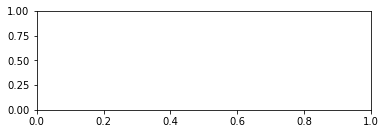

In [29]:
plot.subplot(2,1,1)
plot.plot(history.history['accuracy'])
plot.plot(history.history['val_accuracy'])
plot.title('Model Accuracy')
plot.xlabel('epochs')
plot.ylabel('accuracy')
plot.legend(['x_train','y_train'], loc = 'lower right')

In [34]:
print(history.history)

{'loss': [3.3961434364318848, 3.283909320831299, 3.306972026824951, 3.24212908744812, 3.257779836654663, 3.2352163791656494, 3.2481913566589355, 3.270015001296997, 3.211134433746338, 3.252040147781372, 3.224433660507202, 3.2387855052948, 3.2588703632354736, 3.2423086166381836, 3.228203058242798, 3.2331111431121826, 3.2520995140075684, 3.25793194770813, 3.2508323192596436, 3.286440134048462], 'accuracy': [0.7428333163261414, 0.7756166458129883, 0.7795000076293945, 0.7868333458900452, 0.7878333330154419, 0.7894166707992554, 0.7898833155632019, 0.789733350276947, 0.7936499714851379, 0.7918833494186401, 0.7936000227928162, 0.793583333492279, 0.7923666834831238, 0.7934666872024536, 0.794783353805542, 0.7950000166893005, 0.7938166856765747, 0.79339998960495, 0.7941666841506958, 0.7925999760627747], 'val_loss': [0.1396193951368332, 0.11330913007259369, 0.07801221311092377, 0.08080319315195084, 0.0675278827548027, 0.06095642223954201, 0.06780562549829483, 0.08369667828083038, 0.073576211929321